In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
sns.set_style("darkgrid")

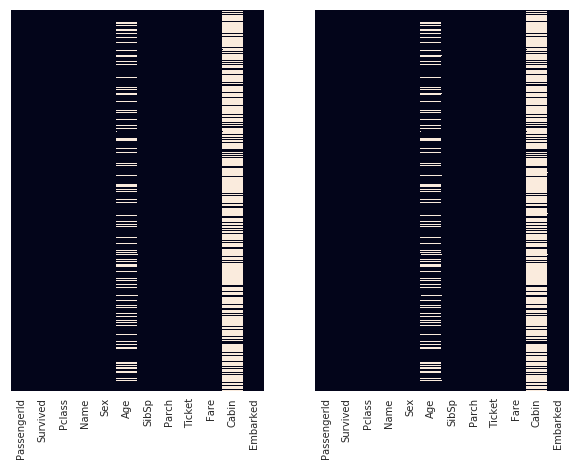

In [8]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(7)
fig.set_figwidth(10)

sns.heatmap(df_train.isnull(), ax=ax[0], yticklabels=False, cbar=False)
sns.heatmap(df_train.isna(), ax=ax[1], yticklabels=False, cbar=False)

/Users/lality/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/lality/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/lality/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/lality/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

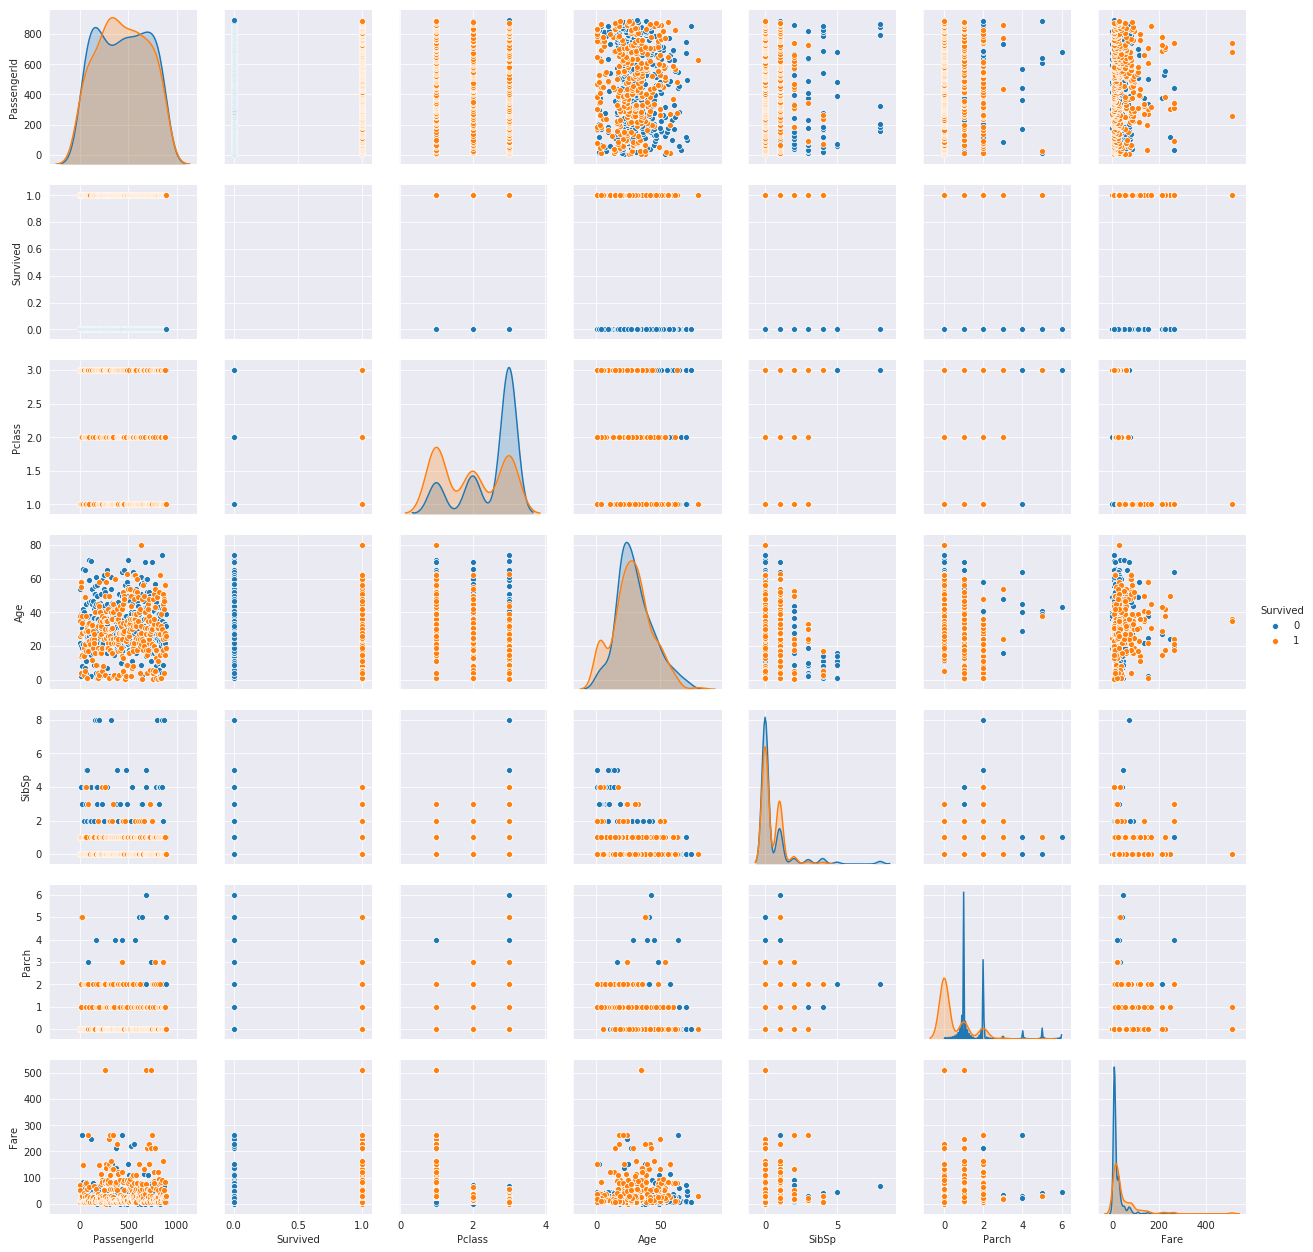

In [9]:
sns.pairplot(df_train, hue='Survived')

In [27]:
sns.heatmap(df_train.corr, center=0)

ValueError: Must pass 2-d input

In [11]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train.Survived

In [23]:
X_train.groupby(['Pclass', 'Sex']).Age.mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [24]:
X_train.groupby(['Pclass', 'Sex']).Age.median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [12]:
X = pd.concat([X, pd.get_dummies(X.Sex, prefix='Gender')], axis=1)

In [13]:
X = pd.concat([X, pd.get_dummies(X.Embarked, prefix='Embarked')], axis=1)

In [14]:
X.drop(['Embarked', 'Cabin', 'Ticket', 'Name', 'PassengerId', 'Sex'], axis=1, inplace=True);

In [41]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    if pd.isnull(age):
        if Pclass == 1:
            return X.groupby('Pclass').Age.mean()[1]
        elif Pclass == 2:
            return X.groupby('Pclass').Age.mean()[2]
        else:
            return X.groupby('Pclass').Age.mean()[3]
    else:
        return age

In [ ]:
X.Age = X[['Age', 'Pclass']].apply(impute_age, axis=1)

In [42]:
from sklearn.preprocessing import Imputer


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [47]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
y_prediction = classifier.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.74      0.70      0.72       111

   micro avg       0.77      0.77      0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

[[129  28]
 [ 33  78]]


In [51]:
accuracy_score(y_test, y_prediction)

0.7723880597014925

In [52]:
X.shape

(891, 10)

In [54]:
df_test = pd.read_csv('data/test.csv')

In [55]:
df_test.shape

(418, 11)

,Pclass,Age,SibSp,Parch,Fare,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
445,1,4.000000,0,2,81.8583,0,1,0,0,1
650,3,25.140620,0,0,7.8958,0,1,0,0,1
172,3,1.000000,1,1,11.1333,1,0,0,0,1
450,2,36.000000,1,2,27.7500,0,1,0,0,1
314,2,43.000000,1,1,26.2500,0,1,0,0,1
332,1,38.000000,0,1,153.4625,0,1,0,0,1
801,2,31.000000,1,1,26.2500,1,0,0,0,1
90,3,29.000000,0,0,8.0500,0,1,0,0,1
834,3,18.000000,0,0,8.3000,0,1,0,0,1
181,2,29.877630,0,0,15.0500,0,1,1,0,0


In [58]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S
